# Challenge #14
**Eric Zhou**  
**April 27, 2025**

# Introduction
Through Challenge 13, we explored benchmarking CUDA GPU performance by computing data of different sizes. GPU accelerators can indeed provide better performance through parallel computing, but they are constrained by additional memory allocation and data transmission.

In this Challenge 14, we want to move futher cuda code with computing th e the Fibonacci sequence

In [1]:
raw_text= """
MatrixSize,HostMalloc_ms,DeviceMalloc_ms,MemcpyHtoD_ms,Kernel_ms,MemcpyDtoH_ms,FreeHost_ms,FreeDevice_ms,TotalMeasured_ms
[GPU] 32768,0.00637,0.12528,1.15149,54.71350,0.28051,0.00243,0.13354,56.41312
[CPU] 32768, 0.00525, 2.35801, 0.00046, 2.36372
[GPU] 65536,0.00243,0.13424,0.28163,0.00310,0.20118,0.00240,0.11296,0.73795
[CPU] 65536, 0.00179, 4.71453, 0.00038, 4.71669
[GPU] 131072,0.00243,0.11078,0.48189,0.00240,0.24752,0.00243,0.09581,0.94326
[CPU] 131072, 0.00135, 9.54433, 0.00044, 9.54612
[GPU] 262144,0.01562,0.17437,0.98381,0.00243,1.57184,0.00243,0.21184,2.96234
[CPU] 262144, 0.00152, 19.37883, 0.00068, 19.38103
[GPU] 524288,0.02246,0.17923,1.95155,0.00240,4.19677,0.16643,0.21309,6.73194
[CPU] 524288, 0.01367, 39.42983, 0.00071, 39.44422
[GPU] 1048576,0.02029,0.18669,3.71462,0.00243,7.78845,0.25949,0.33104,12.30301
[CPU] 1048576, 0.01564, 77.68552, 0.00051, 77.70166
[GPU] 2097152,0.01760,0.25085,7.20720,0.00304,15.83933,0.54643,0.50266,24.36710
[CPU] 2097152, 0.01929, 159.57866, 0.00121, 159.59916
[GPU] 4194304,0.02618,0.33229,14.33414,0.00416,30.51360,1.04733,0.92214,47.17984
[CPU] 4194304, 0.01913, 324.02953, 1.18704, 325.23570
[GPU] 8388608,0.03277,0.34365,28.58787,0.00326,62.74080,3.77533,1.63808,97.12176
[CPU] 8388608, 0.02515, 640.00127, 3.83710, 643.86352
[GPU] 16777216,0.02397,0.34970,57.07328,0.00397,126.53354,7.67853,2.43104,194.09402
[CPU] 16777216, 0.02750, 1379.84861, 14.14025, 1394.01635
[GPU] 33554432,0.02886,0.50307,144.98230,0.00502,276.39468,30.28096,2.74816,454.94305
[CPU] 33554432, 0.02916, 2683.77767, 16.75657, 2700.56340

"""

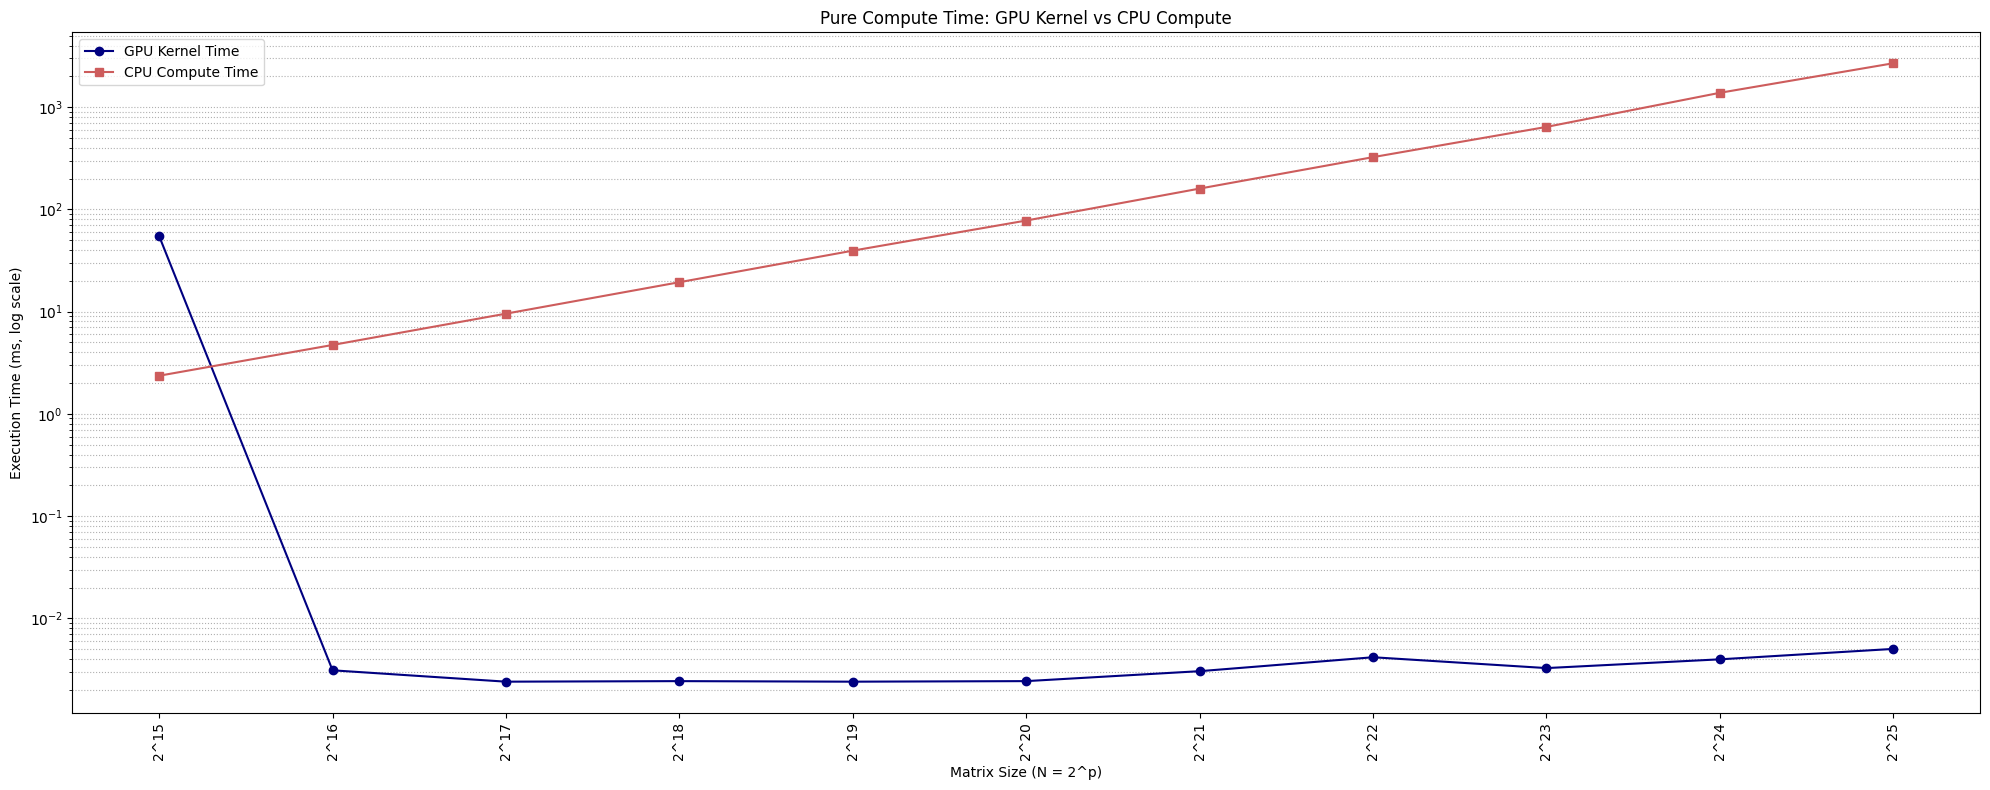

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

gpu_records = []
cpu_records = []

for line in raw_text.splitlines():
    line = line.strip()
    if line.startswith("[GPU]"):
        parts = line.replace("[GPU]", "").split(",")
        gpu_records.append([int(parts[0])] + [float(x) for x in parts[1:]])
    elif line.startswith("[CPU]"):
        parts = line.replace("[CPU]", "").replace(",", "").split()
        cpu_records.append([int(parts[0])] + [float(x) for x in parts[1:]])

gpu = pd.DataFrame(gpu_records, columns=[
    "MatrixSize",
    "HostMalloc_ms", "DeviceMalloc_ms",
    "MemcpyHtoD_ms", "Kernel_ms",
    "MemcpyDtoH_ms", "FreeHost_ms",
    "FreeDevice_ms", "TotalGPU_ms"
])

cpu = pd.DataFrame(cpu_records, columns=[
    "MatrixSize",
    "HostMallocCPU_ms", "ComputeCPU_ms",
    "HostFreeCPU_ms", "TotalCPU_ms"
])

gpu["Power"] = gpu["MatrixSize"].apply(lambda n: n.bit_length() - 1)
cpu["Power"] = cpu["MatrixSize"].apply(lambda n: n.bit_length() - 1)

plt.figure(figsize=(20,8))

x = range(len(gpu))
labels = [f"2^{p}" for p in gpu["Power"]]

plt.plot(x, gpu["Kernel_ms"], marker='o', label="GPU Kernel Time", color="navy")
plt.plot(x, cpu["ComputeCPU_ms"], marker='s', label="CPU Compute Time", color="indianred")

plt.yscale("log")
plt.xticks(x, labels, rotation=90)
plt.xlabel("Matrix Size (N = 2^p)")
plt.ylabel("Execution Time (ms, log scale)")
plt.title("Pure Compute Time: GPU Kernel vs CPU Compute")
plt.grid(axis='y', linestyle=':', which='both')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
raw_text= """
N = 32768: SAXPY = 0.15485 ms, FIB = 0.60829 ms
N = 65536: SAXPY = 0.01590 ms, FIB = 2.13133 ms
N = 131072: SAXPY = 0.01600 ms, FIB = 7.26838 ms
N = 262144: SAXPY = 0.01555 ms, FIB = 27.47395 ms
N = 524288: SAXPY = 0.02678 ms, FIB = 106.73731 ms
N = 1048576: SAXPY = 0.05210 ms, FIB = 224.89561 ms
N = 2097152: SAXPY = 0.10010 ms, FIB = 846.38940 ms
N = 4194304: SAXPY = 0.19072 ms, FIB = 3409.77466 ms
N = 8388608: SAXPY = 0.38579 ms, FIB = 13843.29102 ms
N = 16777216: SAXPY = 0.77763 ms, FIB = 57546.64453 ms
N = 33554432: SAXPY = 1.56736 ms, FIB = 243300.93750 ms
"""

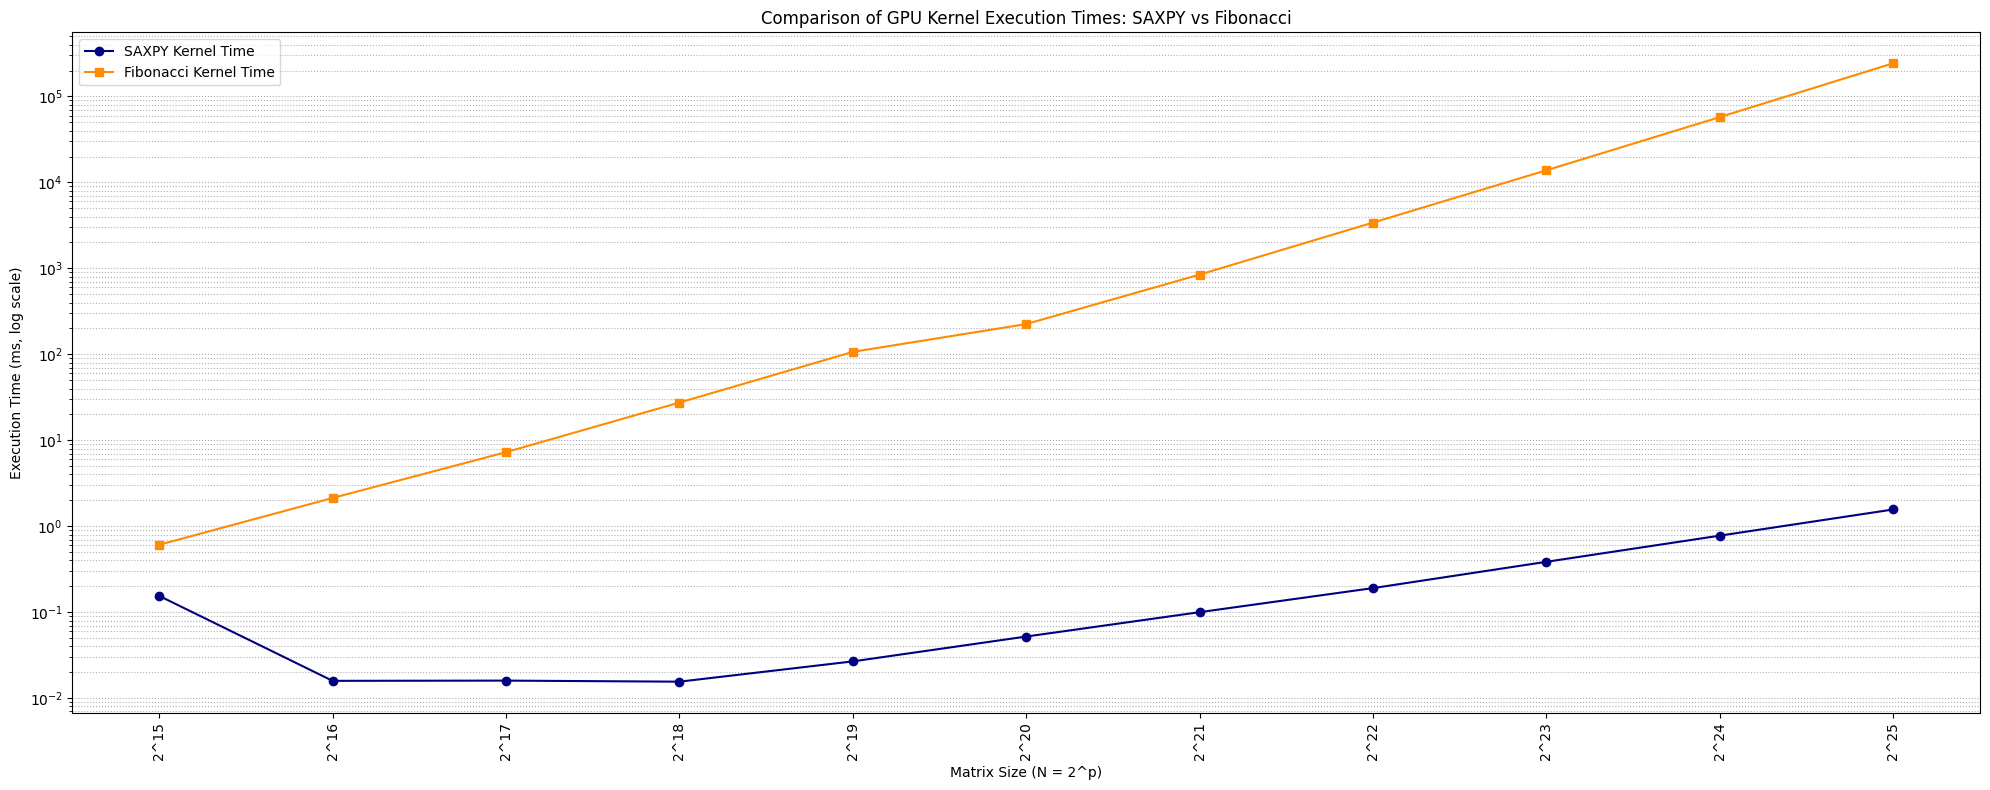

In [7]:

# ===== Parse the input =====
records = []
for line in raw_text.strip().splitlines():
    line = line.strip()
    if line:
        parts = line.split(":")
        n = int(parts[0].strip().replace("N = ", ""))
        rest = parts[1].split(",")
        saxpy_time = float(rest[0].strip().replace("SAXPY = ", "").replace(" ms", ""))
        fib_time = float(rest[1].strip().replace("FIB = ", "").replace(" ms", ""))
        records.append((n, saxpy_time, fib_time))

# ===== Create DataFrame =====
df = pd.DataFrame(records, columns=["MatrixSize", "SAXPY_ms", "FIB_ms"])
df["Power"] = df["MatrixSize"].apply(lambda n: n.bit_length() - 1)

# ===== Plot the comparison =====
plt.figure(figsize=(20, 8))

x = range(len(df))
labels = [f"2^{p}" for p in df["Power"]]

# Plot lines
plt.plot(x, df["SAXPY_ms"], marker='o', label="SAXPY Kernel Time", color="navy")
plt.plot(x, df["FIB_ms"], marker='s', label="Fibonacci Kernel Time", color="darkorange")

# Style
plt.yscale("log")
plt.xticks(x, labels, rotation=90)
plt.xlabel("Matrix Size (N = 2^p)")
plt.ylabel("Execution Time (ms, log scale)")
plt.title("Comparison of GPU Kernel Execution Times: SAXPY vs Fibonacci")
plt.grid(axis='y', linestyle=':', which='both')
plt.legend()
plt.tight_layout()
plt.show()

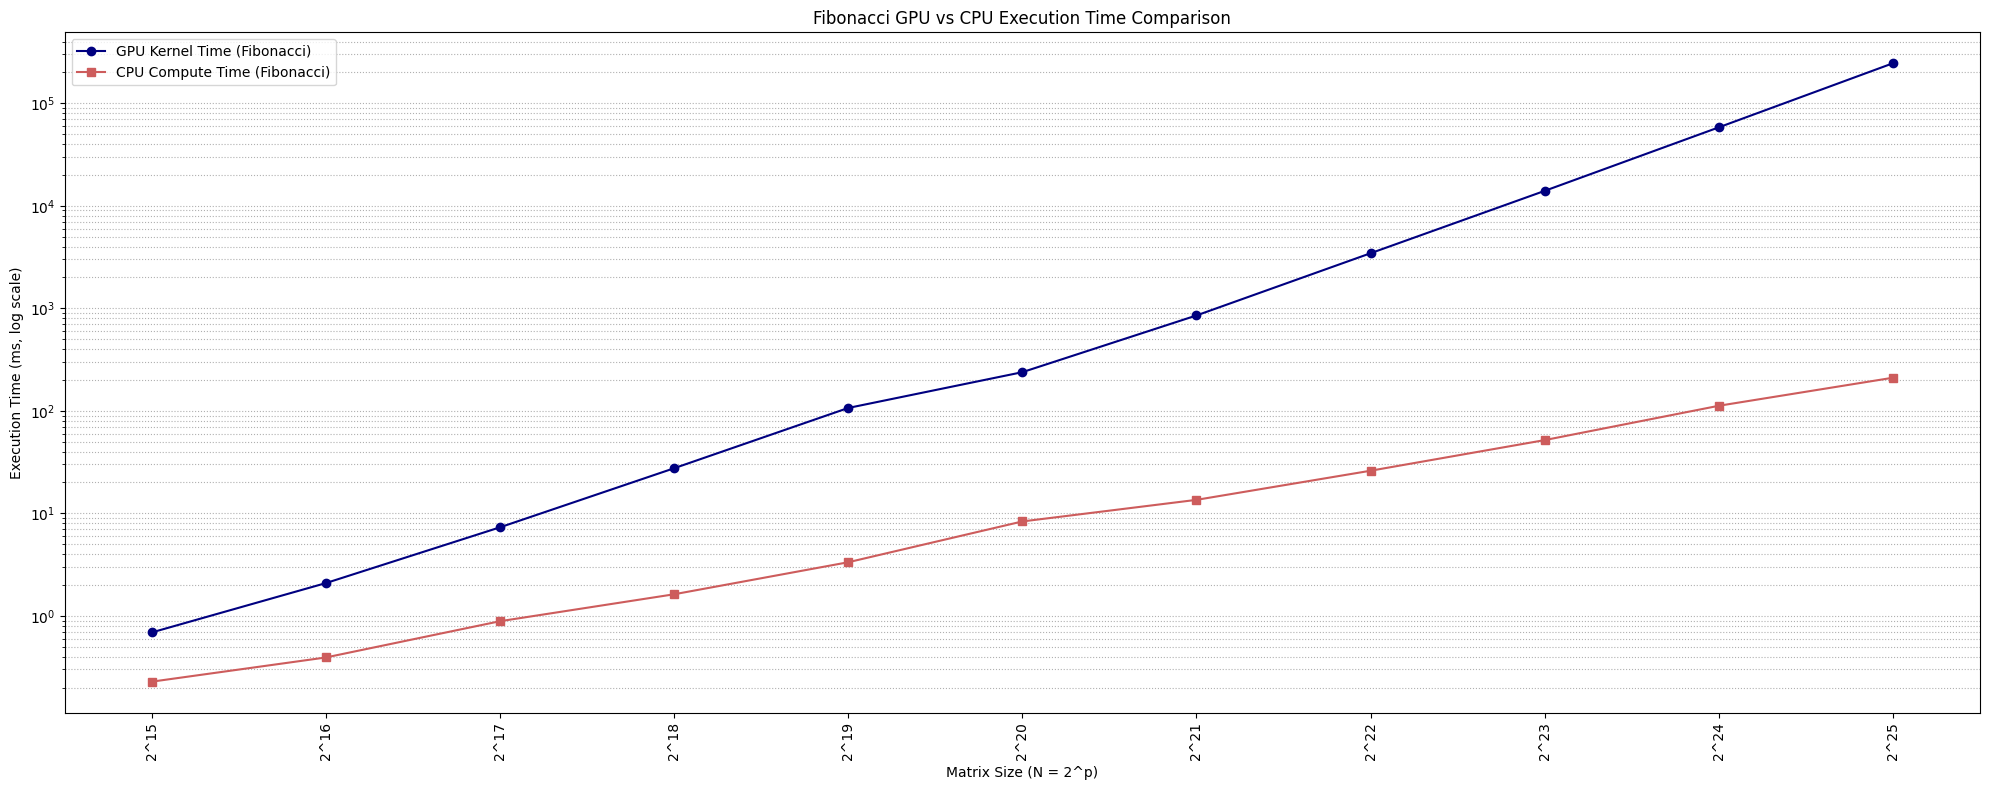

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the benchmark CSV file
df = pd.read_csv("gpu_cpu_fib_benchmark.csv")

# Create a Power column for easier x-axis labeling
df["Power"] = df["MatrixSize"].apply(lambda n: n.bit_length() - 1)

# Plotting
plt.figure(figsize=(20, 8))

x = range(len(df))
labels = [f"2^{p}" for p in df["Power"]]

# Plot GPU and CPU execution times
plt.plot(x, df["KernelTime_FIB_ms"], marker='o', label="GPU Kernel Time (Fibonacci)", color="navy")
plt.plot(x, df["CPUTime_FIB_ms"], marker='s', label="CPU Compute Time (Fibonacci)", color="indianred")

# Style settings
plt.yscale("log")
plt.xticks(x, labels, rotation=90)
plt.xlabel("Matrix Size (N = 2^p)")
plt.ylabel("Execution Time (ms, log scale)")
plt.title("Fibonacci GPU vs CPU Execution Time Comparison")
plt.grid(axis='y', linestyle=':', which='both')
plt.legend()
plt.tight_layout()
plt.show()